✍ Начнём наше исследование со знакомства с предоставленными данными. Также мы подгрузим дополнительные источники данных и расширим исходный датасет.

Заранее импортируем модули, которые понадобятся нам для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Data shape: {}'.format(taxi_data.shape))
# Data shape: (1458644, 11)

Data shape: (1458644, 11)


In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**Задание 2.1**

Для начала посмотрим на временные рамки в данных.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

In [5]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Выберите верные временные рамки (без учёта времени), за которые представлены данные:

In [6]:
date_taxi = taxi_data['pickup_datetime'].dt.date
print('Min date:', date_taxi.min())
print('Max date:', date_taxi.max())


Min date: 2016-01-01
Max date: 2016-06-30


**Задание 2.2**  

Посмотрим на пропуски.

Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [7]:
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Посмотрим на статистические характеристики некоторых признаков.

**Задание 2.3**

1. Сколько уникальных таксопарков присутствует в данных?

In [8]:
# taxi_data['vendor_id'].unique()
taxi_data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

2. Каково максимальное количество пассажиров?

In [9]:
taxi_data['passenger_count'].max()

9

3. Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах, округлив до целого числа.
4. Чему равно минимальное и максимальное время поездки (в секундах)?

In [10]:
print (taxi_data['trip_duration'].mean(), taxi_data['trip_duration'].median())
print (taxi_data['trip_duration'].min(), taxi_data['trip_duration'].max())

959.4922729603659 662.0
1 3526282


In [11]:
# taxi_data['trip_time'].dt.seconds.describe()

Что интересного мы увидели? В данных присутствуют поездки, продолжительность которых составляет одну секунду, а также поездки, продолжительность которых больше 40 дней. Сразу приходит мысль, что это выбросы.

→ При дальнейшем анализе выяснится, что у нас также есть «телепортации» — поездки, которые были проделаны за секунды на большие расстояния. Но всему своё время.

Чтобы однозначно обозначить такие записи в таблице как выбросы, нам необходимо произвести более глубокий анализ данных с подключением дополнительной информации.

**Примечание**. На основе полученной статистической информации о целевом признаке trip_duration мы также делаем важный вывод, что использование среднего в качестве центральной меры распределения длительности поездок будет грубой ошибкой. Лучше всего подойдут меры, не зависящие от выбросов, такие как усечённое среднее, логарифмическое среднее или медиана. При проведении исследований мы будем использовать медиану, а наша метрика качества моделей будет завязана на логарифмическом среднем.

Займёмся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.

**Примечание**. Так как все манипуляции над данными мы будем применять как с тренировочным, так и с тестовым набором данных, во избежание дублирования кода мы будем производить предобработку с помощью функций. Также применение функций позволит нам сделать код гораздо более эстетичным и читабельным, что будет плюсом при просмотре вашего проекта потенциальным работодателем.

Начнём с **временных характеристик**. Как нам уже известно, хранить дату и время в формате datetime как категориальный признак редко имеет смысл, поэтому их разбивают на отдельные признаки. Эти признаки могут как стать основными факторами при построении модели, так и быть вспомогательными для извлечения информации из других таблиц.

**Задание 2.4**

Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в неё тремя столбцами:

- pickup_date — дата включения счётчика/начала поездки (без времени);
- pickup_hour — час включения счётчика;
- pickup_day_of_week — день недели, в который был включён счётчик.

Сколько поездок было совершено в субботу?

In [12]:
def add_datetime_features(DataFrame):
    DataFrame['pickup_date'] = pd.to_datetime(DataFrame['pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.date
    DataFrame['pickup_hour'] = pd.to_datetime(DataFrame['pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour
    DataFrame['pickup_day_of_week'] = pd.to_datetime(DataFrame['pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.day_of_week
    return DataFrame

In [13]:
add_datetime_features(taxi_data)
print (taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0])

220868


Сколько поездок в среднем совершается за день? Ответ округлите до целого числа

In [14]:
# print (taxi_data['pickup_date'].shape[0]/len(taxi_data['pickup_date'].unique()))
print (taxi_data['pickup_date'].shape[0]/taxi_data['pickup_date'].unique().shape[0])

8014.527472527472


**Задание 2.5**

Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы (с данными о поездках и с данными о праздничных днях) и возвращает обновлённую таблицу с данными о поездках с добавленным в неё столбцом pickup_holiday — бинарным признаком того, начата ли поездка в праздничный день (1 — да, 0 — нет).

Примените полученную функцию к таблице.

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого числа.

In [15]:
def add_holiday_features(df_taxi, df_holiday):
   df_holiday['date']  = pd.to_datetime(df_holiday['date'])
   holiday_list = np.array(df_holiday['date'].dt.date)
   df_taxi['pickup_datetime'] = df_taxi['pickup_datetime'].dt.date
   df_taxi['pickup_holiday'] = df_taxi['pickup_datetime'].apply(lambda x: 1 if (x in holiday_list) else 0)
   return df_taxi 

In [16]:
holiday_data = pd.read_csv("data/holiday_data.csv", sep=';')
holiday_data.head()
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      14 non-null     object
 1   date     14 non-null     object
 2   holiday  14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [17]:
add_holiday_features(taxi_data, holiday_data)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0
1,id2377394,1,2016-06-12,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0
2,id3858529,2,2016-01-19,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0
3,id3504673,2,2016-04-06,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0
4,id2181028,2,2016-03-26,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,4,0
1458640,id1049543,1,2016-01-10,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,6,0
1458641,id2304944,2,2016-04-22,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,4,0
1458642,id2714485,1,2016-01-05,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,1,0


In [18]:
taxi_data['pickup_holiday'].value_counts()

0    1407522
1      51122
Name: pickup_holiday, dtype: int64

In [19]:
taxi_data[taxi_data['pickup_holiday'] ==1]['trip_duration'].median()

585.0

**Задание 2.6**

Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы (с данными о поездках и с данными из OSRM) и возвращает обновлённую таблицу с данными о поездках с добавленными в неё тремя столбцами:

- total_distance;
- total_travel_time;
- number_of_steps.

Для этого выделите из таблицы с данными из OSRM столбец id и интересующие нас три столбца, затем объедините таблицы по столбцу id с типом объединения left.

Примените полученную функцию к таблице.

In [20]:
osrm_data = pd.read_csv("data/osrm_data_train.csv")
osrm_data.head()
osrm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


In [21]:
def add_osrm_features(df_taxi, df_osrm):
   df_osrm  = df_osrm[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
   df_taxi = df_taxi.merge(df_osrm, how='left', on='id')
   # df_taxi = df_taxi.join(df_osrm.set_index('id'), on='id', how='left')
   return df_taxi 

In [22]:
taxi_data = add_osrm_features (taxi_data, osrm_data)
taxi_data.head()
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  pickup_date         1458644 non-null  object 
 12  pickup_hour         1458644 non-null  int64  
 13  pickup_day_of_week  1458644 non-null  int64  
 14  pickup_holiday      1458644 non-null  int64  
 15  total_distance 

1. Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? Полученную разницу округлите до целого числа.

In [23]:
round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())

372

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб-источника.

2. После объединения таблиц, сколько строк содержат пропуски?

In [24]:
taxi_data.isnull().sum(axis=1).value_counts()

0    1458643
3          1
dtype: int64

**Задание 2.7**

Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновлённую таблицу с добавленными в неё двумя столбцами:

- haversine_distance — расстояние Хаверсина между точкой, в которой был включён счетчик, и точкой, в которой счётчик был выключен;
- direction — направление движения из точки, в которой был включён счётчик, в точку, в которой счётчик был выключен.

Примените полученную функцию к таблице.

Чему равно медианное расстояние Хаверсина поездок (в километрах)? Ответ округлите до двух знаков после точки-разделителя.

In [25]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус Земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсайна
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [26]:
def add_osrm_features(df_taxi):
    df_taxi['haversine_distance']=df_taxi.apply(lambda x: get_haversine_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)
    df_taxi['direction']=df_taxi.apply(lambda x: get_angle_direction(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)
    return df_taxi 

In [27]:
add_osrm_features(taxi_data)
# taxi_data.head()
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  pickup_date         1458644 non-null  object 
 12  pickup_hour         1458644 non-null  int64  
 13  pickup_day_of_week  1458644 non-null  int64  
 14  pickup_holiday      1458644 non-null  int64  
 15  total_distance 

In [28]:
# Создаём обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# Обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

**Задание 2.8**

Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновлённую таблицу с добавленным в неё столбцом geo_cluster (географический кластер, к которому относится поездка).

Сколько поездок содержится в наименьшем по размеру географическом кластере?

In [29]:
def add_cluster_features(df_taxi, alg):
    df_taxi['geo_cluster'] = alg.predict(coords)
    return df_taxi 

In [30]:
add_cluster_features(taxi_data, kmeans)['geo_cluster'].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

**Задание 2.9**

Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы (с данными о поездках и с данными о погодных условиях на каждый час) и возвращает обновлённую таблицу с данными о поездках с добавленными в неё пятью столбцами:

- temperature — температура;
- visibility — видимость;
- wind speed — средняя скорость ветра;
- precip — количество осадков;
- events — погодные явления.

Для этого переведите столбец time в таблице weather_data в тип datetime и извлеките из этого признака дату (date) и час (hour) совершённого измерения. Затем удалите неинтересующие нас столбцы из таблицы weather_data.

Наконец, объедините таблицу с данными о поездках с таблицей с данными о погодных условиях по столбцам даты (pickup_date и date) и часа (pickup_hour и hour).

Объединение производите таким образом, чтобы сохранить все записи из исходной таблицы с данными о поездках.

После объединения не забудьте удалить из результирующей таблицы столбцы date и hour, которые вы создавали.

Примените полученную функцию к таблице.

In [31]:
weather_data = pd.read_csv("data/weather_data.csv")
weather_data.head()
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       8787 non-null   object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


In [32]:
def add_weather_features(df_taxi, weather_data):
   weather_data = weather_data.drop(['date','hour'], axis=1)
   weather_data['time'] = pd.to_datetime(weather_data['time'])
   weather_data['pickup_date'] = weather_data['time'].dt.date
   weather_data['pickup_hour'] = weather_data['time'].dt.hour
   weather_data = weather_data.drop(['windchill', 'heat index', 'humidity', 'pressure', 'dew Point', 'conditions', 'wind dir', 'time', 'gust speed'], axis=1) 
   # df_taxi = df_taxi.merge(weather_data, how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date','hour'])
   df_taxi = df_taxi.merge(weather_data, how='left', on=['pickup_date', 'pickup_hour'])
   return df_taxi

In [33]:
taxi_data = add_weather_features(taxi_data, weather_data)
# taxi_data = taxi_data.drop(['date','hour'], axis=1)
taxi_data.head()
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  pickup_date         1458644 non-null  object 
 12  pickup_hour         1458644 non-null  int64  
 13  pickup_day_of_week  1458644 non-null  int64  
 14  pickup_holiday      1458644 non-null  int64  
 15  total_distance 

1. Сколько поездок было совершено в снежную погоду?

In [34]:
taxi_data[taxi_data['events'] == 'Snow']['events'].value_counts()

Snow    13126
Name: events, dtype: int64

2. Какую долю (в процентах) в общем количестве наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.

In [35]:
taxi_data.isnull().mean() * 100

id                    0.000000
vendor_id             0.000000
pickup_datetime       0.000000
dropoff_datetime      0.000000
passenger_count       0.000000
pickup_longitude      0.000000
pickup_latitude       0.000000
dropoff_longitude     0.000000
dropoff_latitude      0.000000
store_and_fwd_flag    0.000000
trip_duration         0.000000
pickup_date           0.000000
pickup_hour           0.000000
pickup_day_of_week    0.000000
pickup_holiday        0.000000
total_distance        0.000069
total_travel_time     0.000069
number_of_steps       0.000069
haversine_distance    0.000000
direction             0.000000
geo_cluster           0.000000
temperature           0.824876
visibility            0.824876
wind speed            0.824876
precip                0.824876
events                0.824876
dtype: float64

**Задание 2.10**

Реализуйте функцию fill_null_weather_data(), которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями (temperature, visibility, wind speed, precip) заполните медианным значением температуры, видимости, скорости ветра и количества осадков в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски

Пропуски в столбце events заполните строкой 'None' — символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API (total_distance, total_travel_time и number_of_steps) заполните медианным значением по столбцам.

Примените созданную функцию к таблице с данными о поездках.


In [36]:
def fill_null_weather_data(df_taxi):
    col = ['temperature', 'visibility', 'wind speed', 'precip']
    col2 = ['total_distance', 'total_travel_time', 'number_of_steps']
    for i in col:
        df_taxi[i] = df_taxi[i].fillna(df_taxi.groupby('pickup_date')[i].transform('median'))
    for j in col2:
        df_taxi[j] = df_taxi[j].fillna(taxi_data[j].median()) 
    # df_taxi['events'] = df_taxi['events'].replace(np.nan, 'None')
    df_taxi['events'] = df_taxi['events'].fillna('None') 
    return df_taxi

In [37]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  pickup_date         1458644 non-null  object 
 12  pickup_hour         1458644 non-null  int64  
 13  pickup_day_of_week  1458644 non-null  int64  
 14  pickup_holiday      1458644 non-null  int64  
 15  total_distance 

In [38]:
taxi_data['events'].value_counts()

None    1387217
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до первого знака после точки-разделителя.

In [39]:
taxi_data['temperature'].median()

11.1

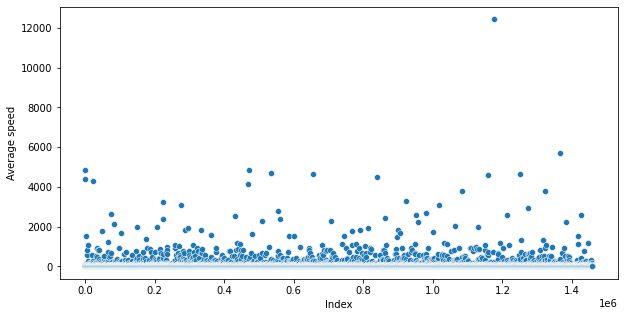

In [40]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

**Задание 2.11**

Найдите поездки, длительность которых превышает 24 часа, и удалите их из набора данных.

1. Сколько выбросов по признаку длительности поездки вам удалось найти?

In [41]:
taxi_data[taxi_data['trip_duration'] > (24*60*60)].shape[0]

4

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

2. Сколько выбросов по признаку скорости вам удалось найти?

In [42]:
taxi_data['avg_speed'] = avg_speed
taxi_data[taxi_data['avg_speed'] > 300].shape[0]

407

___________________________________